In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/기획경영_전처리/경영지원.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,자금 출납 및 운용 부가세법인세 신고 및 기타 세무 그 외 전반적인 재무 관련 업...,컴퓨터 활용 능력 우수자 ...
1,1 관리손익 부서별 매장별 브랜드별 관리손익 산출2 사업계획 연간 사업계획 수립...,대학교4년 졸업 과장대리급48년 경영기획 경험 4년 이상 분석적 사고 키즈 및 ...
2,MGRV가 전개하는 다양한 형태의 사업의 수익성 개선 및 고객 만족도 제고를 위한 ...,기업의 PL 지표에 대한 이해를 바탕으로 수익성 개선을 위한 과제 정의가 가능하...
3,엘리스 부트캠프 졸업생의 진로 설계와 취업 준비를 돕습니다 채용시장 분석을 통해 ...,엘리스 트랙을 비롯한 개발 부트캠프에 관심이 있는 분 타인의 성장을 위해 방향을 ...
4,엘리스 훈련 교육 과정에 참여할 외부 강사를 구인 및 관리합니다 강사 다이렉트 소...,개발자 취업 준비생과 개발자 취업채용 시장에 대한 이해가 있으신 분 부트캠프 등 ...
5,회사 전반적 운영 업무 수행 재무인사구매 관련 업무 업체 계약 및 매입매출 관리 ...,서울 소재 4년제 대학 졸업자학사 계획적인 일정 관리 능력 세심한 자료 관리백업...
6,1 관리손익 부서별 매장별 브랜드별 관리손익 산출2 사업계획 연간 사업계획 수립...,대학교4년 졸업 과장대리급48년 경영기획 경험 4년 이상 분석적 사고 키즈 및 ...
7,나라장터 입찰 제안서 작성 제안 전략 수립 제안서 관리 및 문서화 입찰 계약 등 ...,대졸이상 전공무관 입찰 제안서 작성 및 관리 경험 보유 경력 2년 이상 OA 활용...
8,경영지원 정관 등록 신고 허가 등기 권리 관리 및 갱신 주주총회 이사회 소집 진행...,관련 업계직무 근무경험 3년 이상 Office 툴Excel word 등 활용 능력...
9,리텐틱스 팀은 실리콘밸리에 본사를 두고 서울에 지사를 운영하고 있습니다 실리콘밸리에...,경영지원 및 총무 관련 경험을 2년 이상 5년 미만 보유하신 분 스스로의 성장에 ...


In [3]:
#사용할 column 선택
df = df[['자격요건 및 우대사항']]
df

,자격요건 및 우대사항
0,컴퓨터 활용 능력 우수자 ...
1,대학교4년 졸업 과장대리급48년 경영기획 경험 4년 이상 분석적 사고 키즈 및 ...
2,기업의 PL 지표에 대한 이해를 바탕으로 수익성 개선을 위한 과제 정의가 가능하...
3,엘리스 트랙을 비롯한 개발 부트캠프에 관심이 있는 분 타인의 성장을 위해 방향을 ...
4,개발자 취업 준비생과 개발자 취업채용 시장에 대한 이해가 있으신 분 부트캠프 등 ...
5,서울 소재 4년제 대학 졸업자학사 계획적인 일정 관리 능력 세심한 자료 관리백업...
6,대학교4년 졸업 과장대리급48년 경영기획 경험 4년 이상 분석적 사고 키즈 및 ...
7,대졸이상 전공무관 입찰 제안서 작성 및 관리 경험 보유 경력 2년 이상 OA 활용...
8,관련 업계직무 근무경험 3년 이상 Office 툴Excel word 등 활용 능력...
9,경영지원 및 총무 관련 경험을 2년 이상 5년 미만 보유하신 분 스스로의 성장에 ...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/기획경영_전처리/기획경영(자격요건 및 우대사항).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'자격요건 및 우대사항\n 컴퓨터 활용 능력 우수자                                           회계 업무 2년  6년 기장 or 결산 관련 회계 지식 및 실무 경험 능동적인 업무 수행 및 다양한 직군의 사람들과의 원활한 의사소통 능력 목표를 중심으로 프로세스를 설계할 수 있는 논리력 유연한 사고력 자회사 재무관리 경험자 우대 컴퓨터 활용 능력 우수자 회계 관련 학과를 전공하였거나 회계세무 관련 자격증전산세무회계 보유자                                               스타트업 경험자 결산 및 회계 감사 경험자\n 대학교4년 졸업 과장대리급48년 경영기획 경험 4년 이상 분석적 사고  키즈 및 주니어 패션 경력자 우대 주주 관련 업무 경험\n  기업의 PL 지표에 대한 이해를 바탕으로 수익성 개선을 위한 과제 정의가 가능하신 분  문제 정의해결방안 탐색실행의 일련의 과정을 수행할 수 있는 분  데이터를 활용하여 실제 사업에 적용할 수 있는 분  각 종 데이터를 취합 분석 시각화가 가능한 분SQL 태블로 등 경험 우대  근성Grit을 가지고 새롭게 시도하며 끊임없이 성장하고자 하는 마음가짐Growth mindset을 지니신 분  코리빙Coliving 또는 O2O 비즈니스에 대한 이해와 열정이 있으신 분\n 엘리스 트랙을 비롯한 개발 부트캠프에 관심이 있는 분 타인의 성장을 위해 방향을 제시하고 동기부여 해 주는 것에 보람을 느끼는 분 전략적인 사고를 바탕으로 글과 말을 통해 논리적이고 설득력 있는 커뮤니케이션을 할 수 있는 분 자기주도적으로 문제를 정의하고 해결할 수 있는 역량을 갖춘 분 운영 업무를 프로세스화하고 문서화할 수 있으며 Excel Google Spreadsheet 등 OA 툴 사용이 가능하신 분 소프트웨어 플랫폼 새로운 툴 등 테크 분야에 관심이 있는 분 개발 부트캠프 운영 취업상담 영업 중 한 가지 이상에 경험이 있는 분 데이터 기반으로 의사결정 하는 것에 익숙하신 분 업무 자동화 경

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['자격',
 '요건',
 '및',
 '우대',
 '사항',
 '컴퓨터',
 '활용',
 '능력',
 '우수',
 '회계',
 '업무',
 '기장',
 '결산',
 '관련',
 '회계',
 '지식',
 '및',
 '실무',
 '경험',
 '능동',
 '업무',
 '수행',
 '및',
 '직',
 '사람',
 '의사소통',
 '능력',
 '목표',
 '중심',
 '프로세스',
 '설계',
 '수',
 '논리',
 '사고력',
 '자회사',
 '재무관리',
 '경험',
 '우대',
 '컴퓨터',
 '활용',
 '능력',
 '우수',
 '회계',
 '관련',
 '학과',
 '전공',
 '회계',
 '세무',
 '관련',
 '자격증',
 '전산',
 '세무',
 '회계',
 '보유',
 '스타트업',
 '경험',
 '결산',
 '및',
 '회계',
 '감사',
 '경험',
 '대학교',
 '졸업',
 '과장',
 '대리',
 '영기획',
 '경험',
 '이상',
 '분석',
 '사고',
 '키즈',
 '및',
 '주니어',
 '패션',
 '경력',
 '우대',
 '주주',
 '관련',
 '업무',
 '경험',
 '기업',
 '지표',
 '대한',
 '이해',
 '바탕',
 '수익',
 '개선',
 '위',
 '과제',
 '정의',
 '분',
 '문제',
 '정의',
 '해결',
 '방안',
 '탐색',
 '실행',
 '일련',
 '과정',
 '수행',
 '수',
 '분',
 '데이터',
 '활용',
 '실제',
 '사업',
 '적용',
 '수',
 '분',
 '각',
 '종',
 '데이터',
 '취합',
 '분석',
 '시각',
 '화가',
 '분',
 '태블',
 '등',
 '경험',
 '우대',
 '근성',
 '가지',
 '시도',
 '마음가짐',
 '분',
 '코리',
 '빙',
 '비즈니스',
 '대한',
 '이해',
 '열정',
 '분',
 '엘리스',
 '트랙',
 '비롯',
 '개발',
 '부트캠프',
 '관심',
 '분',
 '타인',
 '성장',
 '

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

2468
548


FreqDist({'분': 245, '경험': 113, '업무': 74, '및': 50, '등': 46, '이상': 44, '경력': 42, '수': 40, '능력': 39, '관련': 37, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [11]:
stop_words = [
   '서비스','근무','정부','사용','것','이해','사용자','작성','문제','우수','능력','관련','이상','기반','비즈니스','활용','스타트업','역량','사업','우대','이해도','보유','업무','대한','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '경험', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['자격',
 '요건',
 '사항',
 '컴퓨터',
 '회계',
 '기장',
 '결산',
 '회계',
 '지식',
 '실무',
 '능동',
 '수행',
 '사람',
 '의사소통',
 '목표',
 '중심',
 '프로세스',
 '설계',
 '논리',
 '사고력',
 '자회사',
 '재무관리',
 '컴퓨터',
 '회계',
 '학과',
 '전공',
 '회계',
 '세무',
 '자격증',
 '전산',
 '세무',
 '회계',
 '결산',
 '회계',
 '감사',
 '대학교',
 '졸업',
 '과장',
 '대리',
 '영기획',
 '분석',
 '사고',
 '키즈',
 '주니어',
 '패션',
 '경력',
 '주주',
 '기업',
 '지표',
 '바탕',
 '수익',
 '개선',
 '과제',
 '정의',
 '정의',
 '방안',
 '탐색',
 '실행',
 '일련',
 '과정',
 '수행',
 '데이터',
 '실제',
 '적용',
 '각',
 '종',
 '데이터',
 '취합',
 '분석',
 '시각',
 '화가',
 '태블',
 '근성',
 '가지',
 '시도',
 '마음가짐',
 '코리',
 '빙',
 '열정',
 '엘리스',
 '트랙',
 '비롯',
 '개발',
 '부트캠프',
 '관심',
 '타인',
 '성장',
 '위해',
 '방향',
 '제시',
 '동기부여',
 '해',
 '보람',
 '전략',
 '사고',
 '바탕',
 '글',
 '말',
 '통해',
 '논리',
 '설득',
 '커뮤니케이션',
 '자기',
 '주도',
 '정의',
 '운영',
 '프로세스',
 '문서',
 '툴',
 '소프트웨어',
 '플랫폼',
 '툴',
 '테크',
 '분야',
 '관심',
 '개발',
 '부트캠프',
 '운영',
 '취업',
 '상담',
 '영업',
 '중',
 '가지',
 '데이터',
 '의사결정',
 '자동화',
 '자동화',
 '세팅',
 '서치',
 '펌',
 '경력',
 '개발자',
 '취업',
 '준비',
 '생',
 '개발자',
 '취업',
 '채용',
 '시

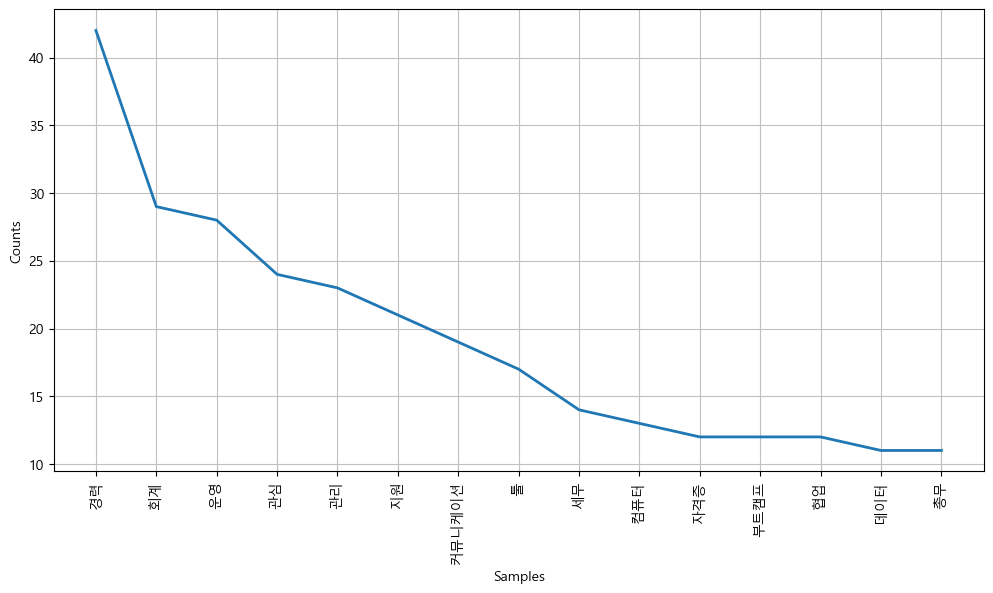

In [12]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(15)
plt.show()

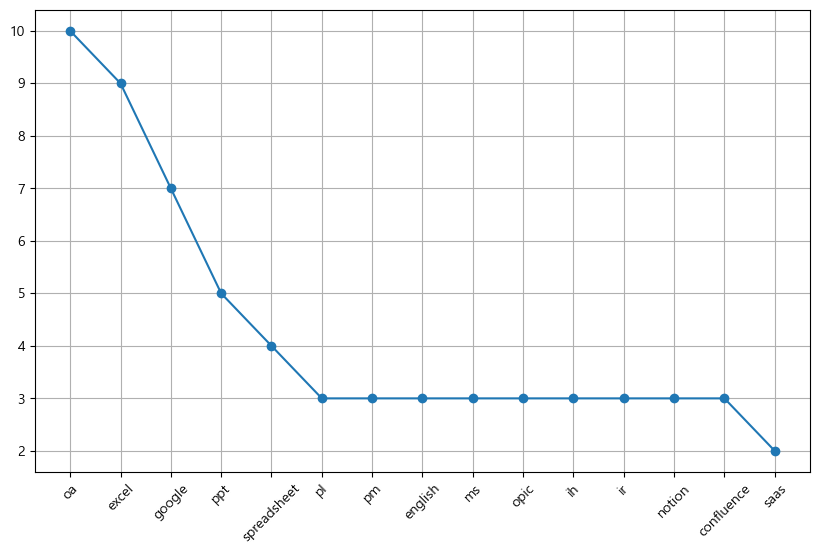

In [13]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)